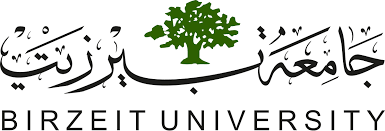

In [2]:
from IPython.display import Image
Image(filename='images.png') 

________________________________________________
Electrical and Computer Engineering Department

Machine Learning and Data Science ‐ ENCS5341

 Assignment #2
_________________________________________________________________________________________________
Prepared By: Tala Abahra   1201002, Sondos Shahin 1200166

Instructor: Dr. Yazan Abu Farha Date: Oct 30, 2024

Topic: Machine Learning Assignment: 1
https://github.com/sondosshahin/Machine-Learning-Project-Regression-Analysis-and-Model-Selection-


## 1 - Import Dataset YallaMotors

 The main objective of this dataset is to predict car prices,
making it ideal for developing regression models to understand the relationship between
various features (e.g., car make, model, year, mileage, engine size, etc.) and the target
variable (car price). 

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = [" ", "NA", "N/A", "N A", "NaN"]
data = pd.read_csv("cars.csv", na_values=missing_values)
data.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6265 non-null   object
 6   seats            6205 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


['fiat' 'peugeot' 'suzuki' 'ford' 'honda' 'renault' 'aston-martin' 'gac'
 'toyota' 'genesis' 'hyundai' 'lincoln' 'mg' 'chevrolet' 'mercedes-benz'
 'kia' 'volkswagen' 'land-rover' 'lotus' 'volvo' 'porsche' 'mini'
 'lamborghini' 'nissan' 'mclaren' 'changan' 'great-wall' 'bmw'
 'rolls-royce' 'audi' 'infiniti' 'ram' 'chrysler' 'gmc' 'borgward' 'jeep'
 'alfa-romeo' 'chery' 'skoda' 'lexus' 'jaguar' 'maxus' 'cadillac'
 'ferrari' 'mazda' 'mitsubishi' 'bestune' 'jetour' 'hongqi' 'maserati'
 'geely' 'byd' 'Foton' 'subaru' 'haval' 'isuzu' 'ssang-yong' 'dodge'
 'bentley' 'bugatti' 'opel' 'zotye' 'soueast ' 'dorcen' 'citroen'
 'brilliance' 'seat' 'proton' 'soueast' 'ds' 'jac' 'lada' 'kinglong'
 'baic' 'morgan' 'mahindra' 'tata' 'dfm' 'acura' 'abarth' 'zna' 'tesla']
['ksa' 'egypt' 'bahrain' 'qatar' 'oman' 'kuwait' 'uae']
['Fiat 500e 2021 La Prima' 'Peugeot Traveller 2021 L3 VIP'
 'Suzuki Jimny 2021 1.5L Automatic' ...
 'BMW M8 Convertible 2021 4.4T V8 Competition xDrive (625 Hp)'
 'BMW M8 Coupe 2021

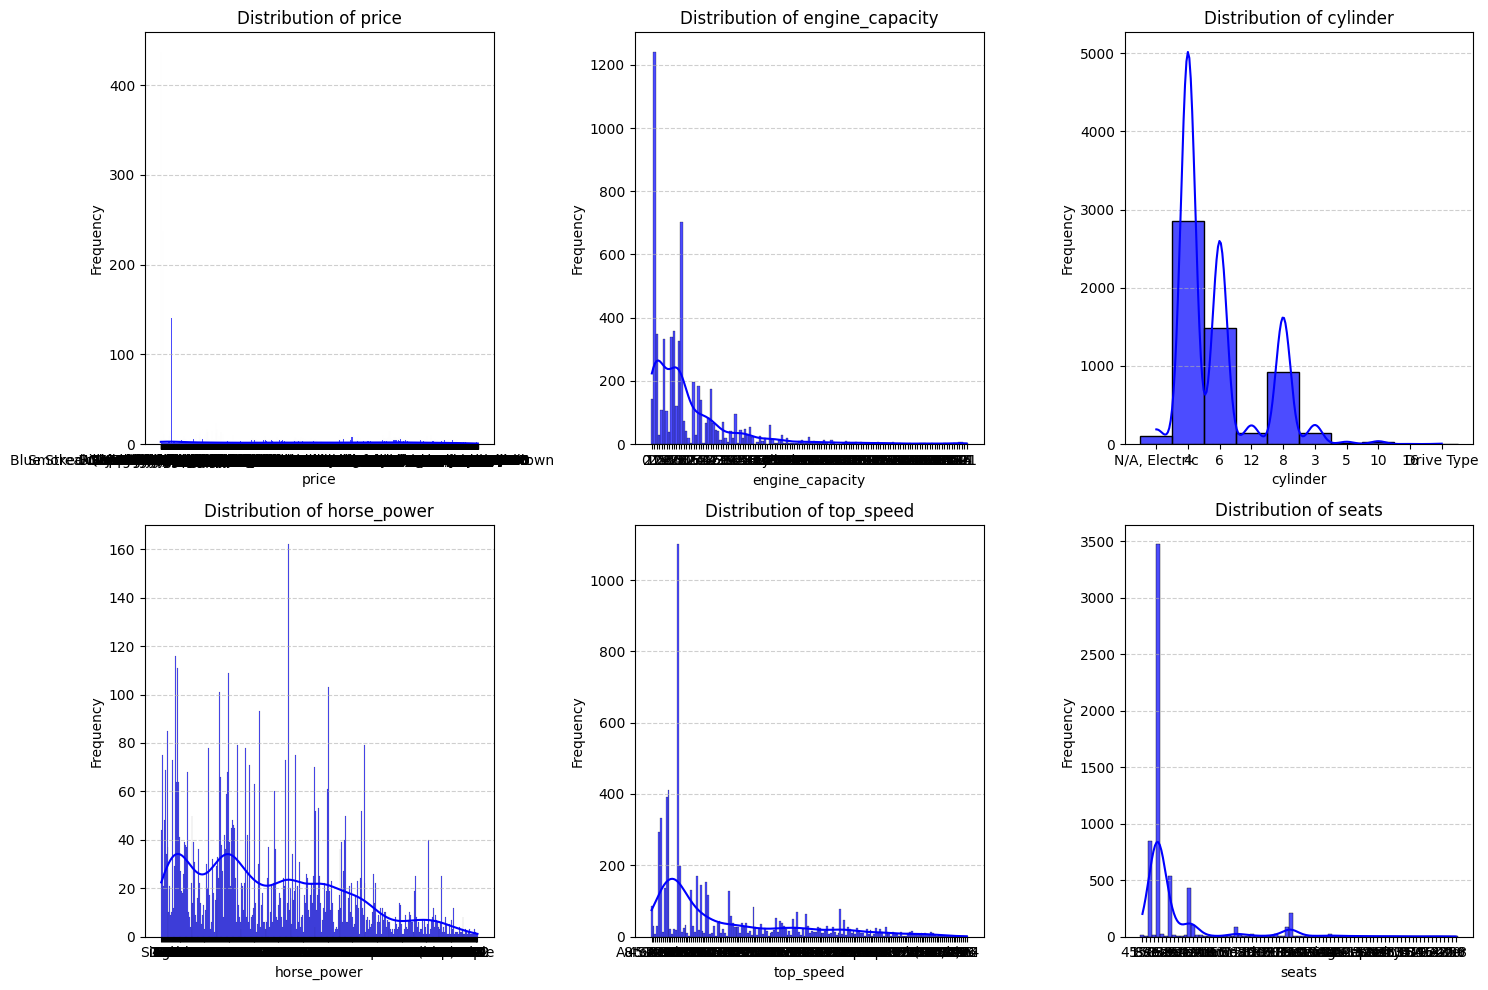

In [13]:
categorical_features = ['car name', 'brand', 'country']
encoded_data = data.copy()  # Create a copy to avoid overwriting the original dataset

# Print unique values to check
print(data['brand'].unique())
print(data['country'].unique())
print(data['car name'].unique())


for column in categorical_features:
    # Calculate frequency of each category
    freq_encoding = encoded_data[column].value_counts() / len(encoded_data)
    # Replace each value in the column with its frequency
    encoded_data[column] = encoded_data[column].map(freq_encoding)
    print(f"Frequency Encoding for '{column}':\n{freq_encoding}\n")  # Display frequency map

# Display encoded dataset
print("Dataset after Frequency Encoding:")
print(encoded_data)

# 2. Visualize numeric columns
numeric_columns = ['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']

# Create distribution plots for numeric columns
plt.figure(figsize=(15, 10))  # Set figure size
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in 2 rows and 3 columns
    sns.histplot(encoded_data[column], kde=True, bins=30, color='blue', alpha=0.7)  # Histogram with KDE
    plt.title(f"Distribution of {column}", fontsize=12)  # Add a title
    plt.xlabel(column, fontsize=10)  # Label x-axis
    plt.ylabel("Frequency", fontsize=10)  # Label y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [10]:
for clm in ['car name','brand','country','price','engine_capacity','cylinder','horse_power','top_speed','seats']:
    print(f'Name: {clm} dtype: {data[clm].dtype}\n')
    print(f'{data[clm].value_counts()}\n')
    print(('-' * 80) + '\n\n')

Name: car name dtype: object

car name
Mercedes-Benz C-Class 2022 C 300                    10
Kia Pegas 2021 1.4L MPI                              7
Mini Hatch 2021 5-Door Cooper                        7
Mercedes-Benz C-Class 2021 C 180                     7
Nissan Pathfinder 2022 3.5L SL 4WD                   7
                                                    ..
BMW 3 Series 2021 M340i xDrive                       1
Lotus Exige 2021 Sport 410 20th Anniversary          1
Jeep Grand Cherokee 2021 6.2L Trackhawk (707 HP)     1
Tesla Model S 2021 Long Range (AWD)                  1
Porsche 718 2021 Boxster 25 Years                    1
Name: count, Length: 2546, dtype: int64

--------------------------------------------------------------------------------


Name: brand dtype: object

brand
mercedes-benz    560
audi             398
bmw              394
toyota           378
ford             323
                ... 
byd                2
zna                2
tata               2
bugatti   

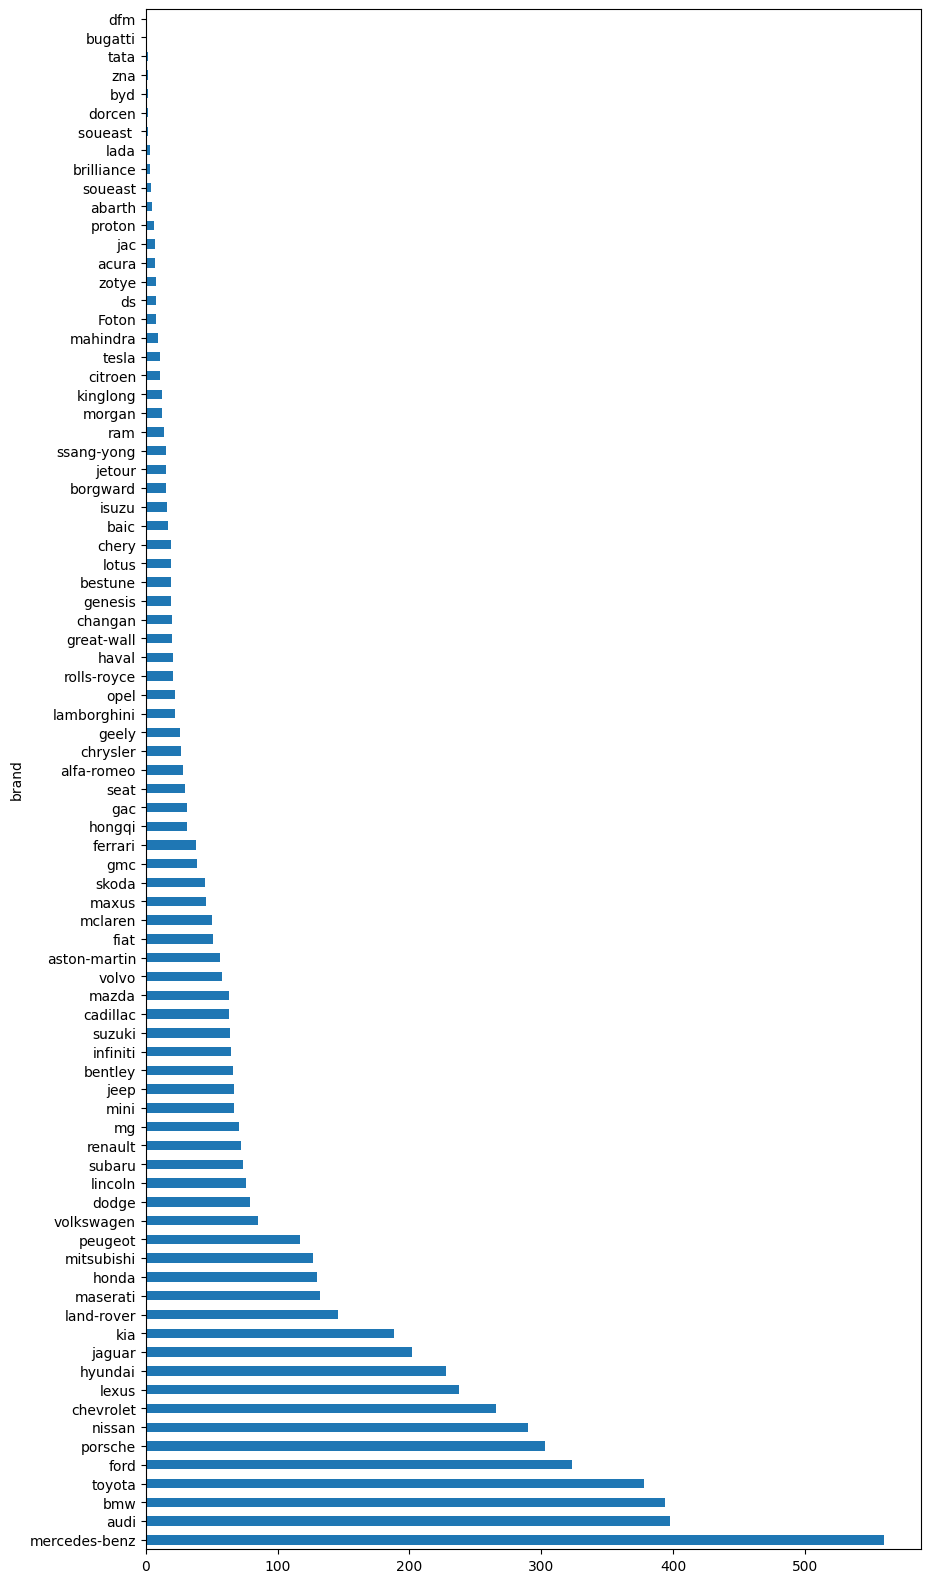

In [12]:
data['brand'].value_counts().plot.barh(figsize=(10,20));

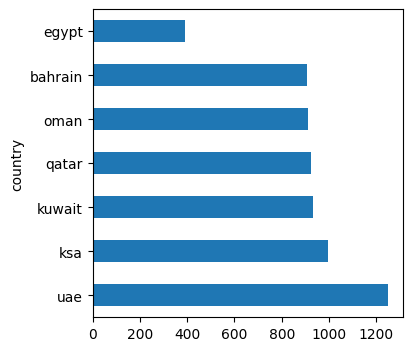

In [13]:
data['country'].value_counts().plot.barh(figsize=(4,4));

## 2- Data Cleaning

To handle missing values in numerical columns using the median, you can use the fillna() method in Pandas, applying the median value for each column where  missing values  (NaN) are present.





- **price**: create a custom function in order to extract price and currency. that car prices are listed in various currencies. To ensure consistency, you may need to standardize all prices to a common currency, such as USD, for a uniform target variable.
- 
 - **car name** and **brand**: no more action.

- **engine_capacity**, **cylinder**, **horse_power**, **top_speed**: simple conversion to float and set a limit
- **country**: simple re-mapping
- **seats**: ignore it

In [38]:

LIMIT_HOURSE_POWER = 1_500.0
LIMIT_KMH = 530.0
LIMIT_ENGINE_CAPACITY = 8.4
LIMIT_CYLINDER_NR = 16.0

In [2]:
def is_numeric(value):
    try:
        
        float(value)  
        return True
    except ValueError:
        return False

In [11]:
def apply_price_adj(price):
    try:
        c = price[:3]
        price_str = price[4:].replace(',', '') 
        
        p = float(price_str)
        pd = p  

        conversion_rates = {
            'AED': 0.27,
            'KWD': 3.28,
            'OMR': 2.60,
            'BHD': 2.65,
            'QAR': 0.25,
            'SAR': 0.27,
            'EGP': 0.021
        }

        if c in conversion_rates:
            pd = p * conversion_rates[c]

        return pd  

    except (ValueError, IndexError):
        return -1 


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Define the missing values
missing_values = [" ", "NA", "N/A", "N A", "NaN"]

# Read the data and replace the missing values with NaN
data = pd.read_csv("cars.csv", na_values=missing_values)
df_upd = data.copy()

# Print the dataframe before any changes
print("Before filling missing values:")
print(df_upd.head())


categorical_features = ['car name', 'brand', 'country']
for column in categorical_features:
    # Calculate frequency of each category
    freq_encoding = df_upd[column].value_counts() / len(df_upd)
    # Replace each value in the column with its frequency
    df_upd[column] = df_upd[column].map(freq_encoding)
    print(f"Frequency Encoding for '{column}':\n{freq_encoding}\n")  # Display frequency map


# Apply price adjustment function (ensure 'apply_price_adj' is defined)
df_upd['price'] = df_upd['price'].apply(apply_price_adj)

# Function to convert non-numeric values to NaN
def to_numeric(value):
    try:
        return pd.to_numeric(value, errors='coerce')  # Coerce non-numeric values to NaN
    except Exception as e:
        return np.nan

# Apply the conversion to numeric for the relevant columns
df_upd['cylinder'] = df_upd['cylinder'].apply(to_numeric)
df_upd['horse_power'] = df_upd['horse_power'].apply(to_numeric)
df_upd['engine_capacity'] = df_upd['engine_capacity'].apply(to_numeric)
df_upd['top_speed'] = df_upd['top_speed'].apply(to_numeric)
df_upd['seats'] = df_upd['seats'].astype(str).str.extract(r'(\d+)')[0].apply(pd.to_numeric, errors='coerce')


print("\n\n")

columns_to_fill = ['car name', 'brand', 'country', 'price', 'cylinder', 'horse_power', 'top_speed', 'seats']  

for column in columns_to_fill:
    # Calculate the median, ignoring NaN values
    median_value = df_upd[column].median()
    print(f"Median value for {column}: {median_value}")
    df_upd[column] = df_upd[column].fillna(median_value)

# Print the dataframe after filling missing values
print("\nAfter filling missing values:")
print(df_upd.head())



################################
print("\n\n");



Before filling missing values:
                           car name                 price engine_capacity  \
0           Fiat 500e 2021 La Prima                   TBD             0.0   
1     Peugeot Traveller 2021 L3 VIP           SAR 140,575             2.0   
2  Suzuki Jimny 2021 1.5L Automatic            SAR 98,785             1.5   
3    Ford Bronco 2021 2.3T Big Bend           SAR 198,000             2.3   
4     Honda HR-V 2021 1.8 i-VTEC LX  Orangeburst Metallic             1.8   

        cylinder horse_power  top_speed     seats    brand country  
0  N/A, Electric      Single  Automatic       150     fiat     ksa  
1              4         180   8 Seater       8.8  peugeot     ksa  
2              4         102        145  4 Seater   suzuki     ksa  
3              4         420   4 Seater       7.5     ford     ksa  
4              4         140        190  5 Seater    honda     ksa  
Frequency Encoding for 'car name':
car name
Mercedes-Benz C-Class 2022 C 300                

In [44]:
columns_to_standardize = ['price', 'horse_power','engine_capacity']
columns_to_normalize = ['top_speed']

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# data_standardized = df_upd.copy()
# data_standardized[columns_to_standardize] = scaler_standard.fit_transform(df_upd[columns_to_standardize])
# df_upd[columns_to_standardize] = scaler_standard.fit_transform(df_upd[columns_to_standardize])

# print(df_upd[columns_to_standardize].dtypes)  
# print(df_upd[columns_to_standardize].head()) 


data_normalized = df_upd.copy()
data_normalized[columns_to_normalize] = scaler_minmax.fit_transform(df_upd[columns_to_normalize])
df_upd[columns_to_normalize] = scaler_minmax.fit_transform(df_upd[columns_to_normalize])


for column in df_upd:
    if column in columns_to_standardize:
        print(f'{column} range before standardizing: {df_upd[column].min()} - {df_upd[column].max()}')
        print(f'{column} range after standardizing: {data_standardized[column].min()} - {data_standardized[column].max()}')
    elif column in columns_to_normalize:
        print(f'{column} range before normalizing: {df_upd[column].min()} - {df_upd[column].max()}')
        print(f'{column} range after normalizing: {data_normalized[column].min()} - {data_normalized[column].max()}')
    print("\n\n")




price range before standardizing: -0.5664619248425364 - 35.93317851234288
price range after standardizing: -0.5664619248425364 - 35.93317851234288



engine_capacity range before standardizing: -0.23334674090601953 - 12.150549016704083
engine_capacity range after standardizing: -0.23334674090601953 - 12.150549016704083






horse_power range before standardizing: -1.5716080679886137 - 26.75107515084667
horse_power range after standardizing: -1.5716080679886137 - 26.75107515084667



top_speed range before normalizing: 0.0 - 1.0
top_speed range after normalizing: 0.0 - 1.0














ValueError: num must be an integer with 1 <= num <= 6, not 7

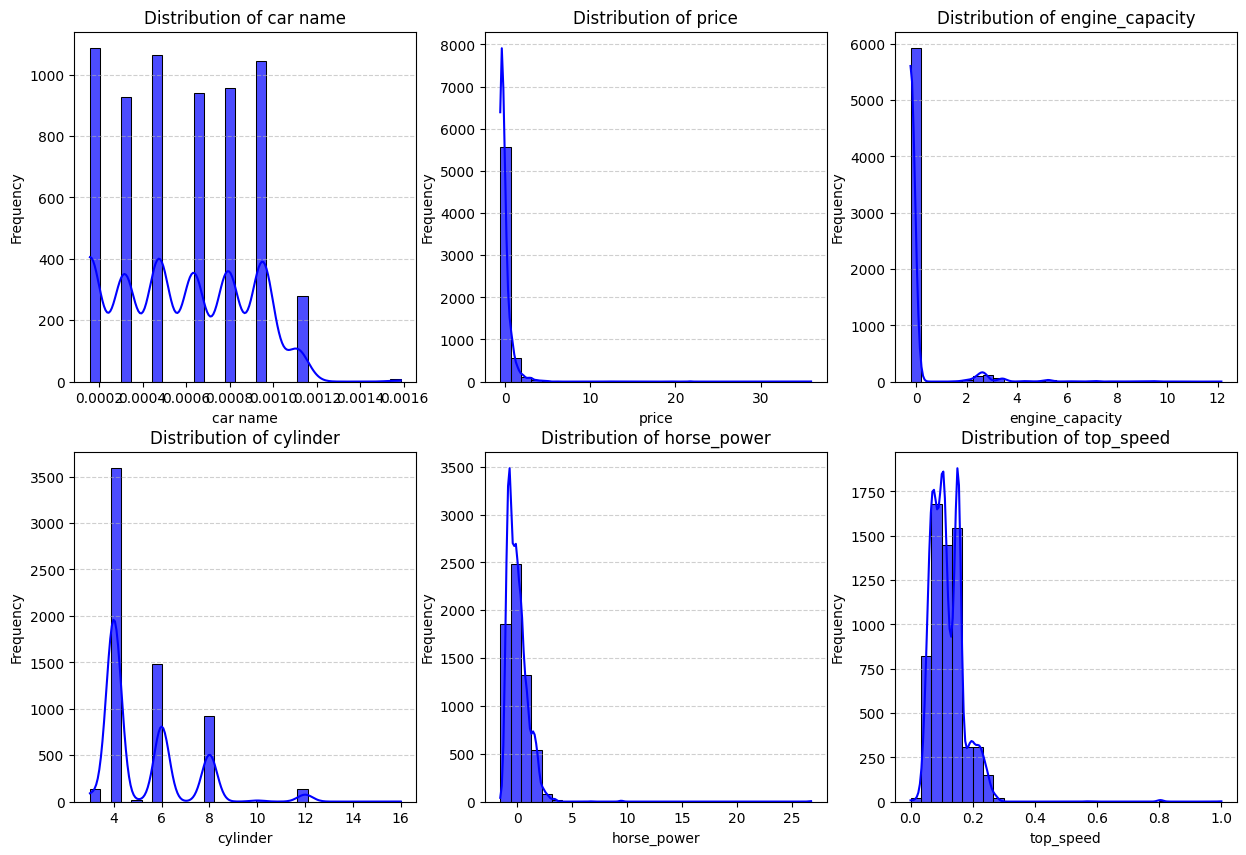

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))  # Set figure size
for i, column in enumerate(df_upd, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in 2 rows and 3 columns
    sns.histplot(df_upd[column], kde=True, bins=30, color='blue', alpha=0.7)  # Histogram with KDE
    plt.title(f"Distribution of {column}", fontsize=12)  # Add a title
    plt.xlabel(column, fontsize=10)  # Label x-axis
    plt.ylabel("Frequency", fontsize=10)  # Label y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 1 - Split the dataset 

Split the dataset into training, validation, and test sets. A common split would be
60% for training, 20% for validation, and 20% for testing.

In [45]:
# First, split the data into 80% training+validation and 20% testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_upd.drop(columns='price')  # price is the target column
y = df_upd['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

# Then, split the 80% training+validation into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


# Print the sizes of each split
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (3784, 8) (3784,)
Validation set size: (1262, 8) (1262,)
Test set size: (1262, 8) (1262,)


## 2-Building Regression Models

Linear regression equation:
y = -0.84 + (-152.28) * car name + (-0.11) * engine_capacity + (0.13) * cylinder + (0.21) * horse_power + (4.56) * top_speed + (-0.00) * seats + (-0.78) * brand + (-1.51) * country 
Validation Mean Squared Error: 0.49178889689827426
Validation R² Score: 0.35088811610424553


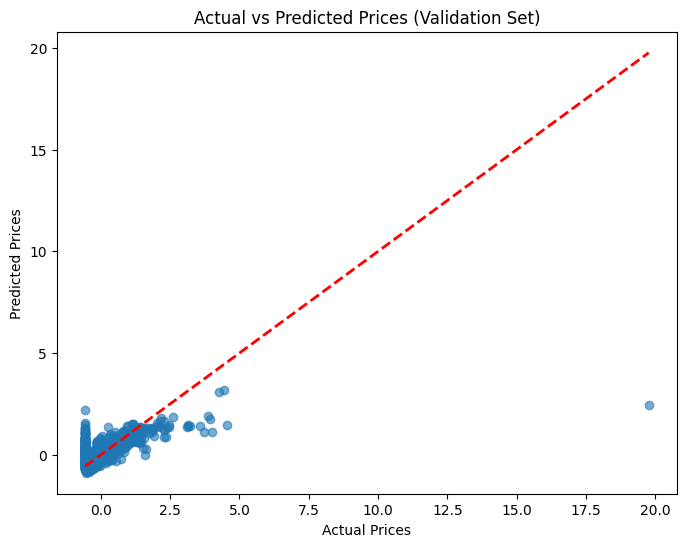

Test Mean Squared Error: 0.6342438357260992
Test R² Score: 0.33012132670463645


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Drop rows with missing values in the training set
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure the target variable is aligned with the features

# Drop rows with missing values in the validation set (if applicable)
X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Ensure the target variable is aligned with the features

# Drop rows with missing values in the test set (if applicable)
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure the target variable is aligned with the features

# Print the new shapes of the datasets after dropping rows with missing values
# print("Training set size after dropping NaNs:", X_train.shape, y_train.shape)
# print("Validation set size after dropping NaNs:", X_val.shape, y_val.shape)
# print("Test set size after dropping NaNs:", X_test.shape, y_test.shape)

# # Check for missing values in the dataset
# missing_values = X_train.isna().sum()

# # Print the features with missing values
# print("Features with missing values:")
# print(missing_values[missing_values > 0])

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Linear regression equation:")
equation = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f"+ ({coef:.2f}) * {X_train.columns[i]} "
print(equation)

y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R² Score: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Validation Set)")
plt.show()

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R² Score: {test_r2}")
